## Information

Submetric: Environmental Pollution

This entails, more specifically, pollution and how polluted each neighborhood is.
 * Safety is determined by the smallest amount of pollution.
 * Each pullution medium is weighted evenly (eg: air, water, land...)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import fpsnippets

# load datasets
facilities = pd.read_csv('TRI_facilities.csv', low_memory=False)
air = pd.read_csv('TRI_air.csv', low_memory=False)
land = pd.read_csv('TRI_land.csv', low_memory=False)
offsite = pd.read_csv('TRI_offsite.csv', low_memory=False)
underground = pd.read_csv('TRI_underground.csv', low_memory=False)
water = pd.read_csv('TRI_water.csv', low_memory=False)

# discard irrelevant columns
combined = pd.concat([
    air[['TOTAL_RELEASE', 'ZIP_CODE']],
    land[['TOTAL_RELEASE', 'ZIP_CODE']],
    offsite.rename(columns={'TRANSFER_AMT': 'TOTAL_RELEASE'})[['TOTAL_RELEASE', 'ZIP_CODE']],
    underground[['TOTAL_RELEASE', 'ZIP_CODE']],
    water[['TOTAL_RELEASE', 'ZIP_CODE']]
], ignore_index=True)

# drop values missing a zip or amount
combined = combined.dropna(subset=['ZIP_CODE', 'TOTAL_RELEASE'])

# make zips str
combined['ZIP_CODE'] = combined['ZIP_CODE'].astype(str).str[:5].str.zfill(5)

# keep only pittsburgh zips
combined = combined[combined['ZIP_CODE'].str.startswith('152')]

# zips have multiple outputs, so distributes amounts amongst the outputs
def zip_to_neighborhoods_and_distribute(zip_code, total_release):
    try:
        nhoods = fpsnippets.zip_to_neighborhoods(zip_code)
        if not nhoods or len(nhoods) == 0:
            return [( "Unknown", total_release )]
        share = total_release / len(nhoods)
        return [(n, share) for n in nhoods]
    except Exception:
        return [("Unknown", total_release)]

# expand row into multiple
expanded_rows = []
for _, row in combined.iterrows():
    expanded_rows.extend(zip_to_neighborhoods_and_distribute(row['ZIP_CODE'], row['TOTAL_RELEASE']))

expanded_df = pd.DataFrame(expanded_rows, columns=['Neighborhood', 'TOTAL_RELEASE'])

# remove unknown values
expanded_df = expanded_df[expanded_df['Neighborhood'] != "Unknown"]

# sum totals
neighborhood_sum = expanded_df.groupby('Neighborhood', as_index=False)['TOTAL_RELEASE'].sum()

# sort amount released
neighborhood_sum = neighborhood_sum.sort_values(by='TOTAL_RELEASE', ascending=False)

# plot
plt.figure(figsize=(12, 7))
sb.barplot(
    data=neighborhood_sum,
    x='Neighborhood',
    y='TOTAL_RELEASE',
    palette='viridis'
)

plt.title("Total Toxic Chemical Releases by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Total Amount Released (M lbs)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

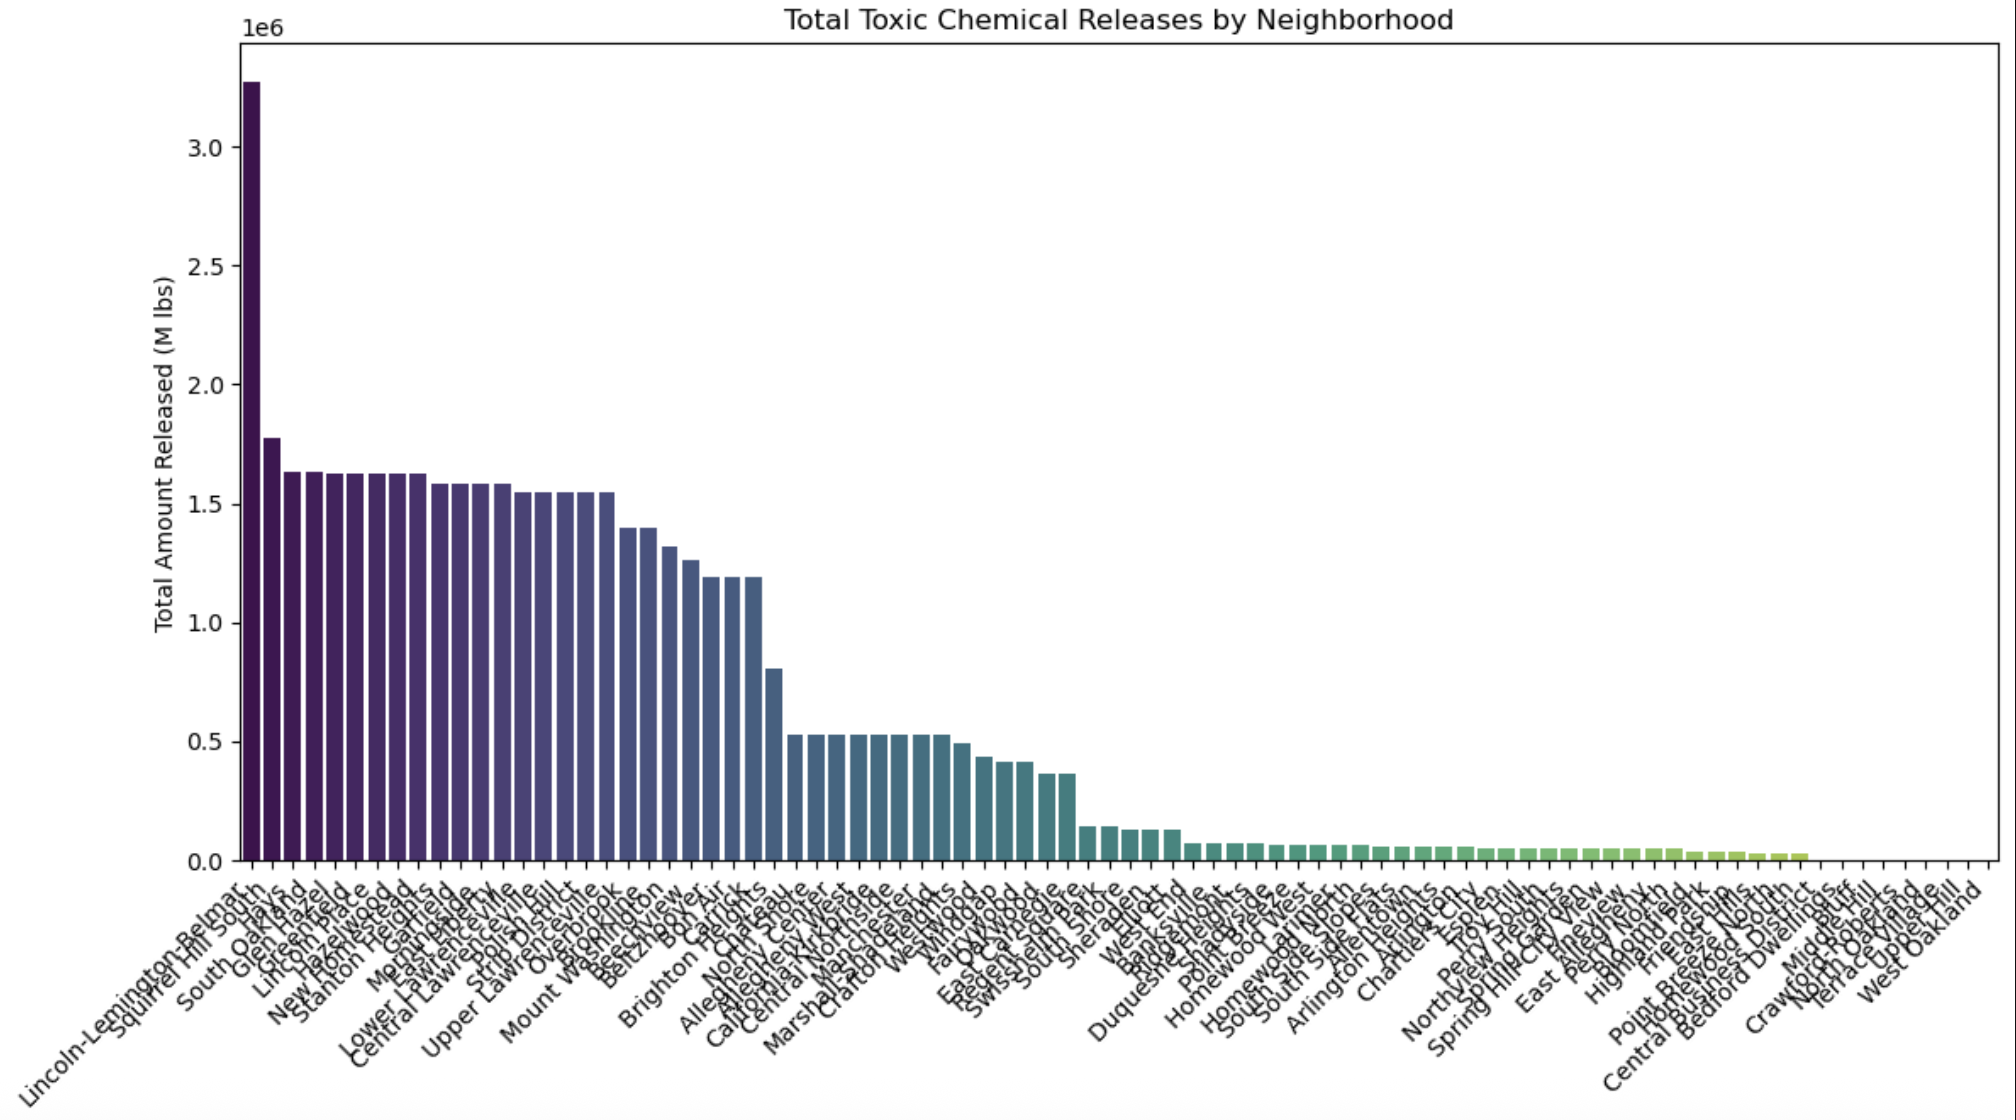

## Summary

Top 10 most polluted neighborhoods:
1. Lincoln-Lemington-Belmar
2. Squirrel Hill South
3. Hays
4. South Oakland
5. Glen Hazel
6. Greenfield
7. Lincoln Place
8. Hazelwood
9. New Homestead
10. Stanton Heights

Note: Lincoln-Lemington-Belmar (#1) is about 2x more polluted than #2, and 2-10 are all about the same amount

## Best Neighborhood

This submetic does not necessarily measure a "best neighborhood" but rather shows the "worst" by this submetric. If one were to be chosen to be the best though, it would be a tie between the following:
* West Oakland
* Upper Hill
* Terrace Village
* North Oakland
* Crawford-Roberts
* Middle Hill
* Bluff
* Bedford Dwelling
* Central Business District

Note: The actual least polluted neighborhood is likely not included in this dataset due to this dataset ONLY including places where sources of pollution originated, so take this section with a grain of salt

## Conclusion

As stated above, the best neighborhood is more difficult to determine through this specific dataset, so this one should more be used to determine what is NOT the best neighborhood. Notably, Lincoln-Lemington-Belmar would certainly be excluded for the running of best neighborhood in Pittsburgh by this metric of "safety".
Personally, the metric of safety as a whole is a good determination of what the best neighborhood is, but environmental pollution is more or less JUST a measurement of safety itself. A good neighborhood can exist in a polluted environment. People's actions are not as heavily affected by pollution (except maybe lead) than other factors, and the people in a place can really be a good determination of how good a place is.